# 서울시 우리마을가게 상권분석서비스(직장인구)
- 데이터 링크 : http://data.seoul.go.kr/dataList/OA-15569/S/1/datasetView.do

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/일일 데이터 분석

/content/drive/MyDrive/일일 데이터 분석


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('./서울시 우리마을가게 상권분석서비스(상권-직장인구).csv', encoding='cp949')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36114 entries, 0 to 36113
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   기준_년월_코드             36114 non-null  int64 
 1   기준_분기_코드             36114 non-null  int64 
 2   상권_구분_코드             36114 non-null  object
 3   상권_구분_코드_명           36114 non-null  object
 4   상권_코드                36114 non-null  int64 
 5   상권_코드_명              36114 non-null  object
 6   총_직장_인구_수            36114 non-null  int64 
 7   남성_직장_인구_수           36114 non-null  int64 
 8   여성_직장_인구_수           36114 non-null  int64 
 9   연령대_10_직장_인구_수       36114 non-null  int64 
 10  연령대_20_직장_인구_수       36114 non-null  int64 
 11  연령대_30_직장_인구_수       36114 non-null  int64 
 12  연령대_40_직장_인구_수       36114 non-null  int64 
 13  연령대_50_직장_인구_수       36114 non-null  int64 
 14  연령대_60_이상_직장_인구_수    36114 non-null  int64 
 15  남성연령대_10_직장_인구_수     36114 non-null  int64 
 16  남성연령

In [ ]:
data.head()

,기준_년월_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,2022,3,U,관광특구,1001496,강남 마이스 관광특구,15904,8904,7000,59,...,3361,2887,1246,225,34,2353,2824,1361,350,78
1,2022,3,U,관광특구,1001495,잠실 관광특구,24375,14199,10176,120,...,4186,3496,2297,1685,69,2238,2379,2121,2217,1152
2,2022,3,U,관광특구,1001494,종로?청계 관광특구,32935,17150,15785,68,...,4911,4591,4158,1190,53,3072,5054,4892,2243,471
3,2022,3,U,관광특구,1001493,동대문패션타운 관광특구,6054,2958,3096,36,...,737,662,600,403,23,891,958,498,461,265
4,2022,3,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,104830,53674,51156,423,...,16080,15133,10824,2640,286,18274,17927,8251,4902,1516


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

light_palette = np.array(raw_light_palette)/255
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

def make_countplot(df,col_name):
  plt.figure(figsize=(15,7))
  sns.countplot(df[col_name])
  plt.title(col_name,size=20)
  plt.show()

def dist_box_plot(df,col_name):
  print(df[col_name].describe())

  plt.figure(figsize=(20,10))
  plt.subplot(2,1,1)
  sns.distplot(df[col_name])

  plt.subplot(2,1,2)
  sns.boxplot(df[col_name])

  plt.show()

def pie_plot(df,col_list,palette,wedgeprops):
  num_list = [data[x].sum() for x in col_list]
  
  plt.figure(figsize=(12,7))
  plt.pie(num_list,
          labels=col_list,
          autopct='%.1f%%',
          startangle=90,
          counterclock=False,
          shadow=True,
          wedgeprops=wedgeprops,
          colors=palette,
          textprops = {'fontsize':13})
  plt.show()

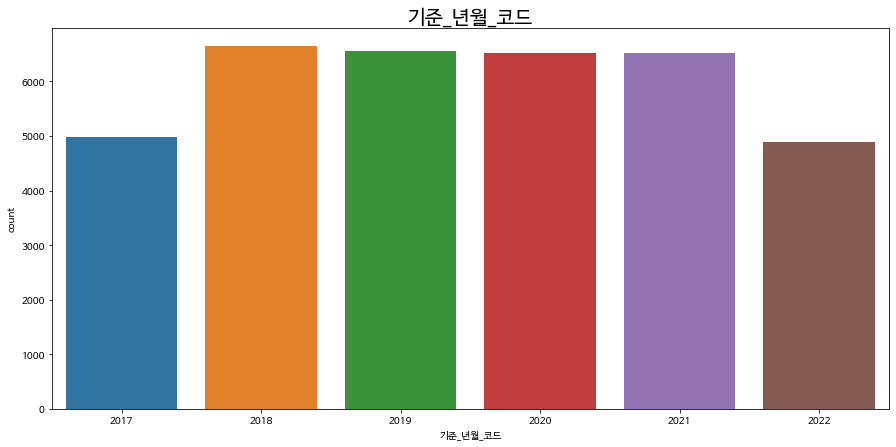

In [ ]:
# 데이터 년도
make_countplot(data,'기준_년월_코드')

- 2017년부터 2022년까지 데이터 존재

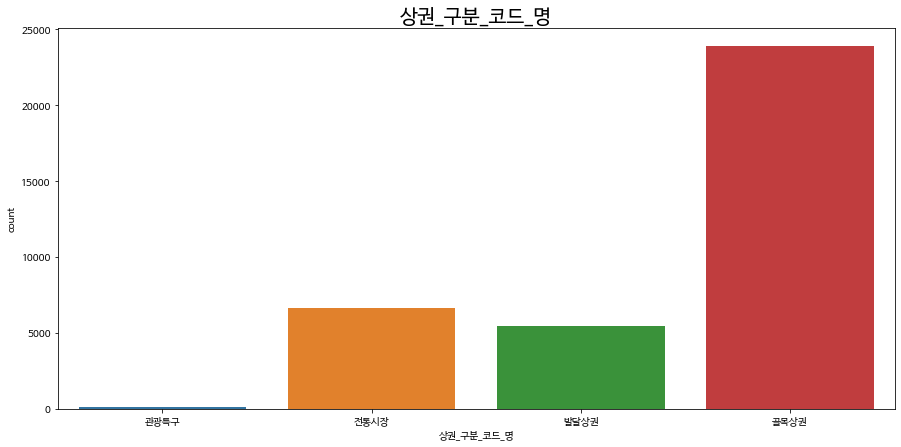

In [ ]:
make_countplot(data,'상권_구분_코드_명')

- 앞서 분석한 추정매출 데이터와 같이 골목상권이 대부분

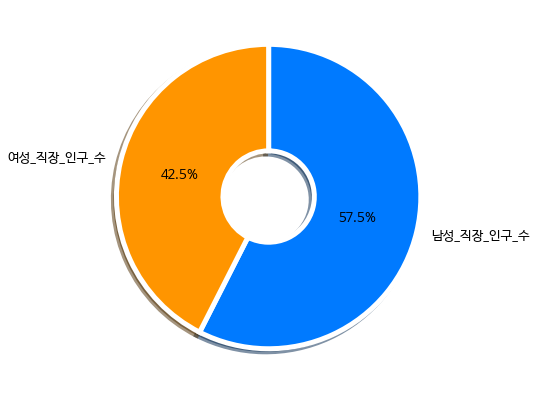

In [ ]:
col_list = ['남성_직장_인구_수','여성_직장_인구_수']
pie_plot(data,col_list,light_palette,wedgeprops)

- 직장인 중 남성이 57.5%로 여성보다 더 많았다.

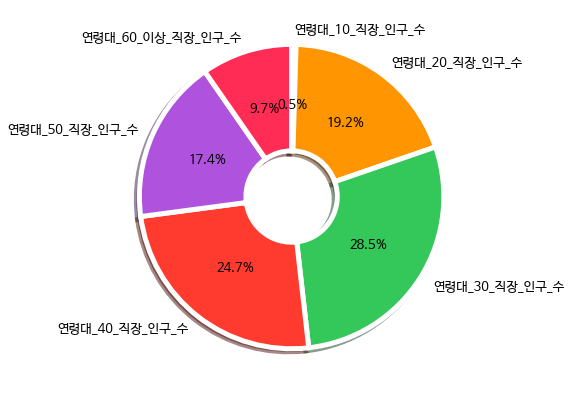

In [ ]:
age = range(10,60,10)
col_list = ['연령대_' + str(x) + '_직장_인구_수' for x in list(age)]
col_list.append('연령대_60_이상_직장_인구_수')
pie_plot(data,col_list,light_palette,wedgeprops)

- 10대는 대부분 학생이므로 직장인의 비율이 매우 적었으며, 30,40대가 각각 28.5%, 24.7%로 1,2위를 차지했다.

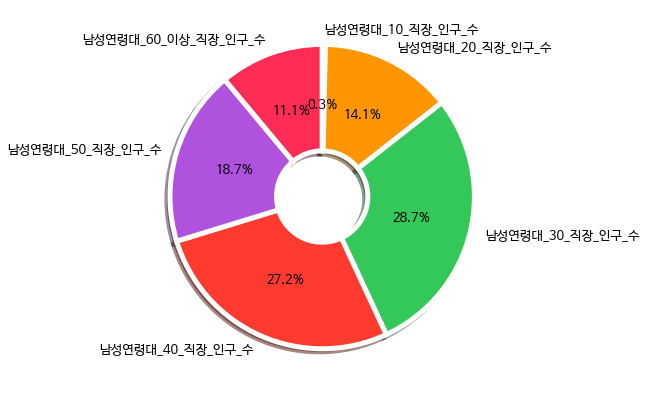

In [ ]:
age = range(10,60,10)
col_list = ['남성연령대_' + str(x) + '_직장_인구_수' for x in list(age)]
col_list.append('남성연령대_60_이상_직장_인구_수')
pie_plot(data,col_list,light_palette,wedgeprops)

- 남성 직장인의 연령대는 전체 연령대 비율에 비해 20대가 조금 적었다.
- 남성은 주로 20대에 군대를 가기 때문에 이 영향이 있는 것으로 생각된다.

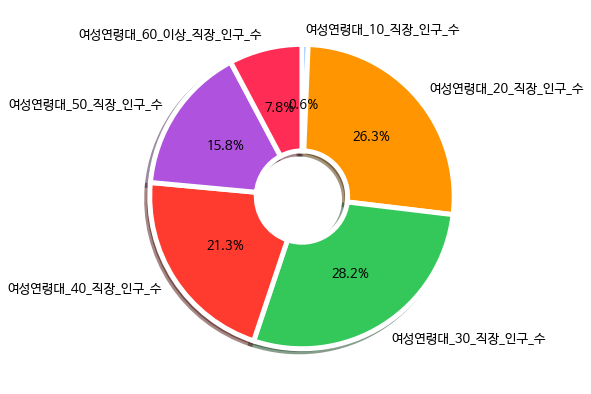

In [ ]:
age = range(10,60,10)
col_list = ['여성연령대_' + str(x) + '_직장_인구_수' for x in list(age)]
col_list.append('여성연령대_60_이상_직장_인구_수')
pie_plot(data,col_list,light_palette,wedgeprops)

- 여성은 남성에 비해 20대의 비율이 많이 높았다.

In [ ]:
# 평균 직장 인구수가 많은 상권 top 10
top_pop = pd.DataFrame(data.groupby('상권_코드_명')['총_직장_인구_수'].mean().sort_values()[::-1][:10]).reset_index()
top_pop

,상권_코드_명,총_직장_인구_수
0,명동 남대문 북창동 다동 무교동 관광특구,133984.18
1,가산디지털단지,100691.27
2,여의도역(여의도),87622.64
3,강남역,78746.00
4,역삼역,67627.09
5,잠실역,59781.45
6,포스코사거리,59254.00
7,광화문역,59061.09
8,구로디지털단지,58114.27
9,선릉역,53342.00


- 흔히 알고 있는 직장이 많이 분포하는 지역의 상권들이 top 10으로 나타났다.

In [ ]:
# 직장인구수 top 10의 상권 구분 코드
# 관광특구 : 1 , 발달상권 : 9 
code_list = top_pop['상권_코드_명']
for code in code_list:
  print(data[data['상권_코드_명'] == code]['상권_구분_코드_명'].unique())

['관광특구']
['발달상권']
['발달상권']
['발달상권']
['발달상권']
['발달상권']
['발달상권']
['발달상권']
['발달상권']
['발달상권']


- top1이었던 명동이 관광특구였으며, 그 외의 모든 상권은 발달상권이었다.

In [ ]:
# 상권구분별 시각화
zz = pd.DataFrame(data.groupby('상권_구분_코드_명')['총_직장_인구_수'].mean()).reset_index()
aa = pd.DataFrame(data.groupby('상권_구분_코드_명')['남성_직장_인구_수', '여성_직장_인구_수'].mean()).reset_index()
bb = pd.DataFrame(data.groupby('상권_구분_코드_명')['연령대_10_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수'].mean()).reset_index()
cc = pd.DataFrame(data.groupby('상권_구분_코드_명')['남성연령대_10_직장_인구_수', '남성연령대_20_직장_인구_수', '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수', '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수'].mean()).reset_index()
dd = pd.DataFrame(data.groupby('상권_구분_코드_명')['여성연령대_10_직장_인구_수', '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수', '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수'].mean()).reset_index()


In [ ]:
def make_plot(df,col_name,palette,wedgeprops):
  plt.figure(figsize=(20,12))
  for i in range(4):
    plt.subplot(2,2,i+1)
    plt.pie(df[df['상권_구분_코드_명'] == col_name[i]].iloc[:,1:],
              labels=df.columns[1:],
              autopct='%.1f%%',
              startangle=90,
              counterclock=False,
              shadow=True,
              wedgeprops=wedgeprops,
              colors=palette,
              textprops = {'fontsize':13})
    plt.title(col_name[i],size=20)

Text(0.5, 1.0, '총 직장 인구 수')

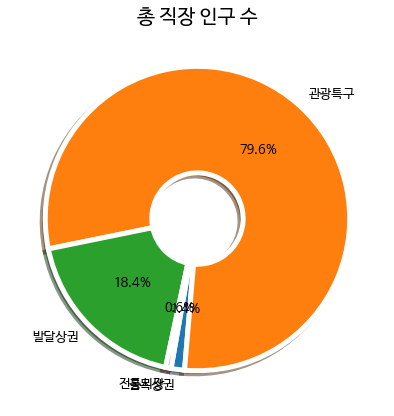

In [ ]:
# 총 직장 인구수
plt.figure(figsize=(12,7))
plt.pie(zz['총_직장_인구_수'],
            labels=zz['상권_구분_코드_명'],
            autopct='%.1f%%',
            startangle=260,
            shadow=True,
            wedgeprops=wedgeprops,
            textprops = {'fontsize':13})
plt.title('총 직장 인구 수',size=20)

- 상권은 관광특구가 가장 적었지만, 직장인은 관광특구 상권 근처에 가장 많이 분포해 있다.

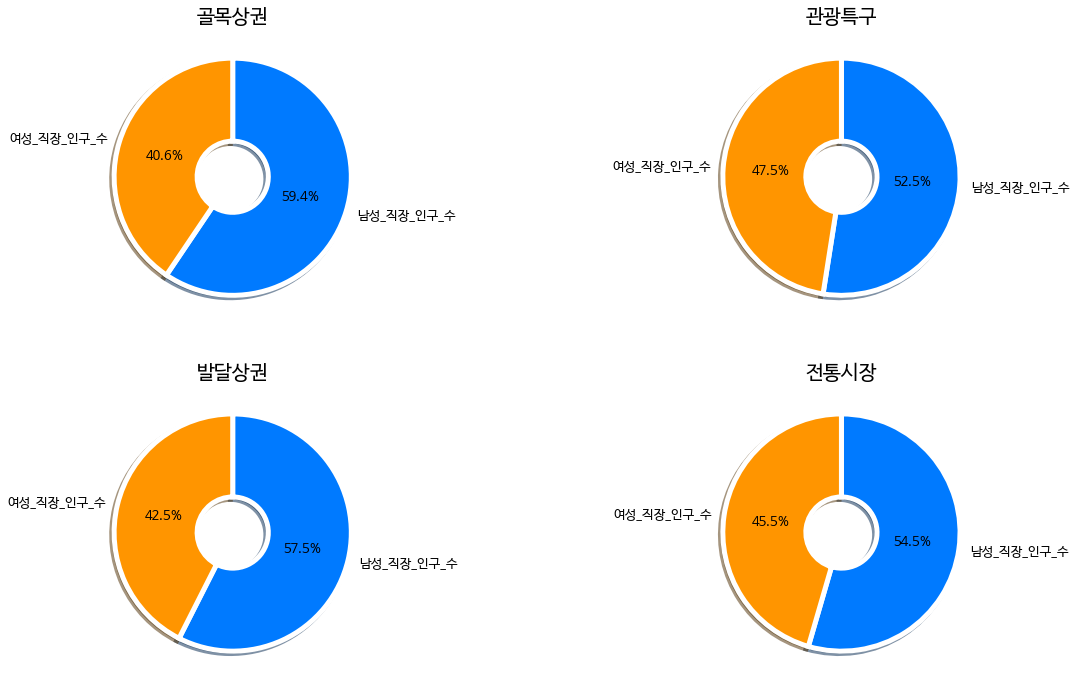

In [ ]:
# 상권별 성별 비율
col_name = ['골목상권','관광특구','발달상권','전통시장']
make_plot(aa,col_name,light_palette,wedgeprops)

- 전체적으로 모든 상권에서 여성보다 남성인 직장인이 많았다.

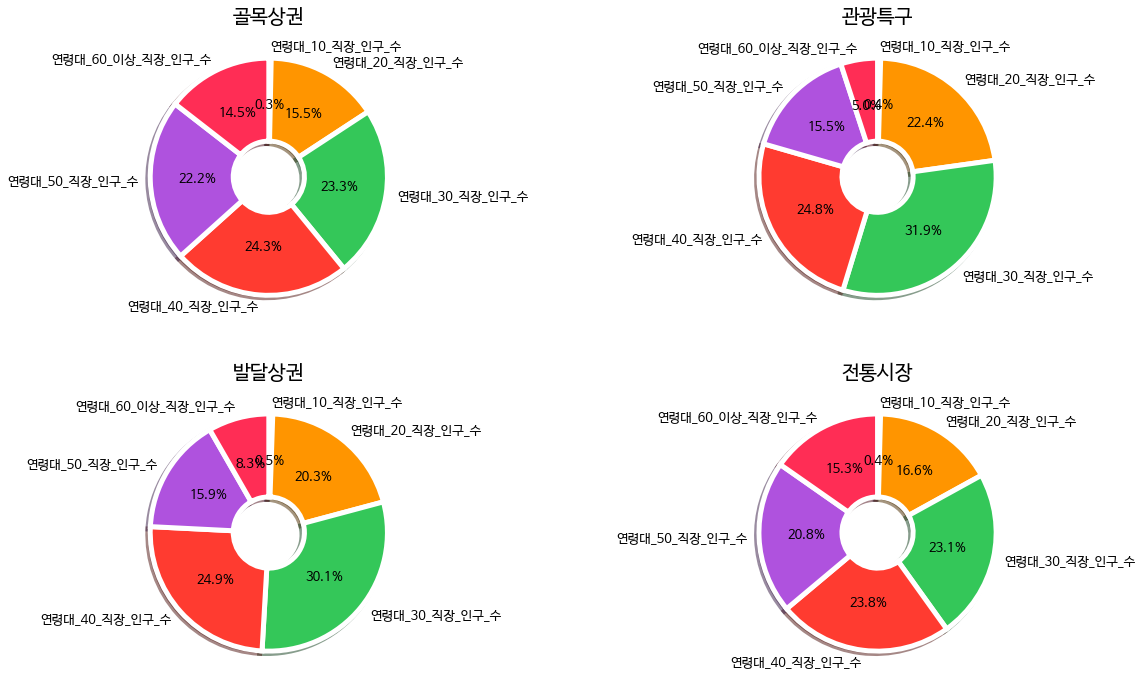

In [ ]:
# 상권별 연령대 비율
make_plot(bb,col_name,light_palette,wedgeprops)

- 직장인이 가장 많은 관광특구의 비율을 살펴보면, 30대가 31.9%로 가장 많았으며, 20 ~ 40대가 대부분을 차지했다.

- 관광특구 > 발달상권 > 전통시장, 골목상권 순서로 직장인의 연령대가 높아진다.

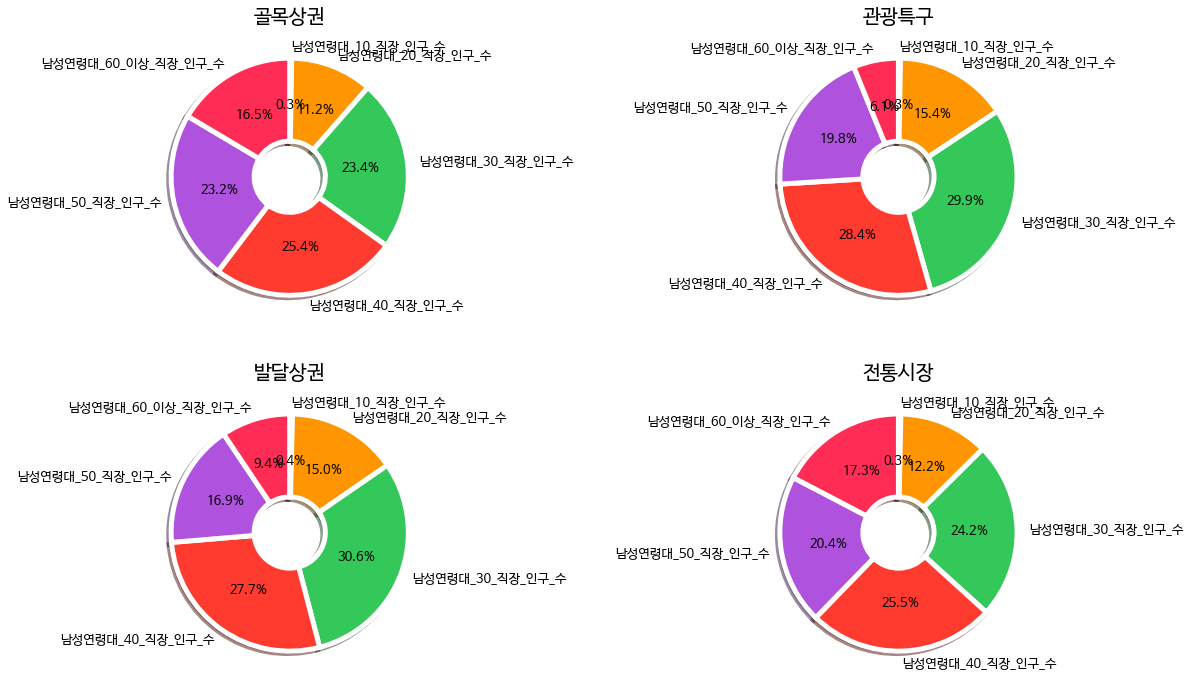

In [ ]:
# 상권별 남성 연령대 비율
make_plot(cc,col_name,light_palette,wedgeprops)

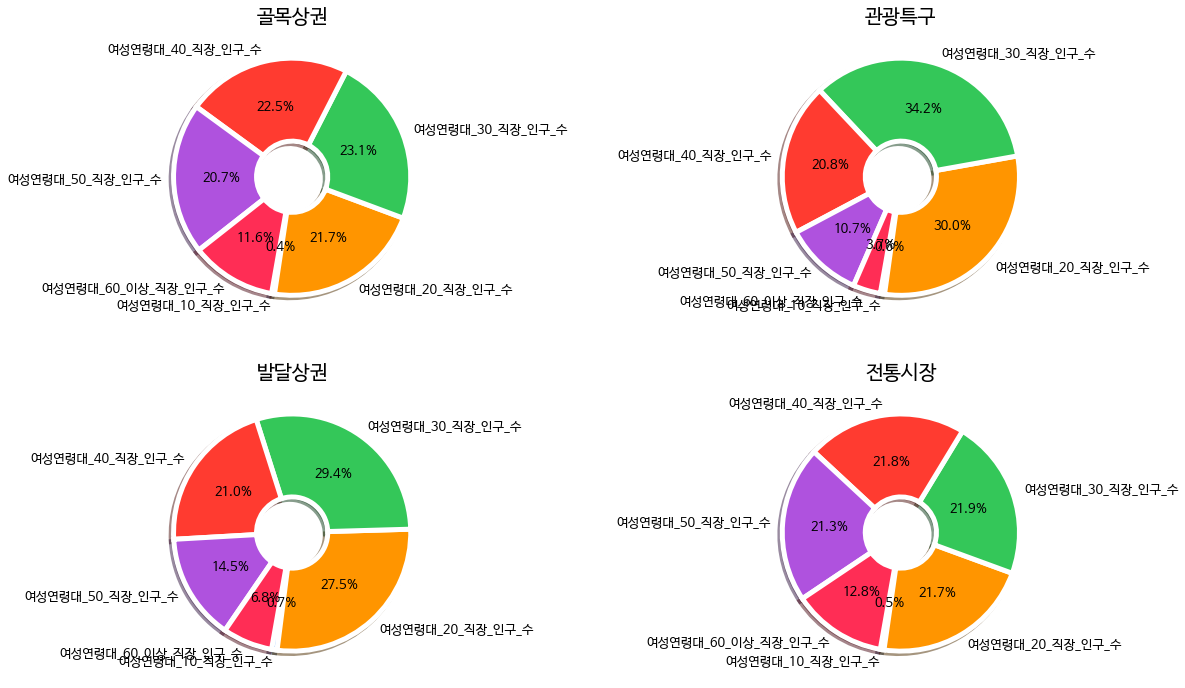

In [ ]:
# 상권별 여성 연령대 비율
make_plot(dd,col_name,light_palette,wedgeprops)